In [1]:
# ============================================================
# Core Data Handling and Numerical Computing
# ============================================================

import numpy as np                  # Numerical computing
import pandas as pd                 # Data manipulation and analysis


# ============================================================
# Scikit-Learn: Preprocessing and Pipelines
# ============================================================

from sklearn.compose import ColumnTransformer      # Column-wise preprocessing
from sklearn.pipeline import Pipeline              # ML pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer           # Missing value handling


# ============================================================
# Scikit-Learn: Model Selection and Validation
# ============================================================

from sklearn.model_selection import (
    train_test_split,               # Train-test splitting
    KFold,                          # K-fold cross-validation
    StratifiedKFold,                # Stratified CV (mainly for classification)
    GridSearchCV,                   # Hyperparameter tuning
    cross_val_score                 # Cross-validation scoring
)


# ============================================================
# Scikit-Learn: Models and Custom Estimators
# ============================================================

from sklearn.linear_model import LinearRegression   # Baseline regression model
from sklearn.base import BaseEstimator, RegressorMixin  # Custom estimator support


# ============================================================
# Scikit-Learn: Evaluation Metrics
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score


# ============================================================
# Visualization and Plotting
# ============================================================

import matplotlib.pyplot as plt     # Core plotting
import seaborn as sns               # Statistical visualization

from IPython.display import Image   # Display images in notebooks

from mlxtend.plotting import (
    scatterplotmatrix,              # Feature relationship plots
    heatmap                         # Correlation heatmaps
)


# ============================================================
# Reproducibility
# ============================================================

from numpy.random import seed        # Set random seed


# ============================================================
# Model Persistence (Saving/Loading Models)
# ============================================================

import pickle                        # Save trained models

In [2]:
df = pd.read_csv('crime.csv')
df.head()

,state,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,region
0,Alabama,7.4,14.7,77.5,20.4,26.0,4.6,70.2,South
1,Alaska,4.3,8.4,90.4,28.1,23.2,6.6,41.6,West
2,Arizona,7.0,13.5,85.1,24.6,23.5,3.9,87.9,West
3,Arkansas,6.3,15.8,81.7,18.4,24.7,4.4,49.0,South
4,California,6.1,14.0,81.2,27.5,21.8,4.9,96.7,West


In [3]:
df.describe(include=['float64'])

,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.604000,11.440000,85.482000,24.932000,22.970000,3.904000,67.726000
std,2.510221,2.937096,3.959782,4.312319,3.038814,0.947383,20.562099
min,0.600000,7.300000,77.100000,15.300000,13.600000,2.200000,27.900000
25%,2.600000,9.425000,82.525000,22.525000,20.950000,3.225000,49.800000
50%,4.550000,10.550000,86.100000,24.450000,22.800000,3.900000,70.250000
75%,6.300000,13.375000,88.175000,27.450000,24.575000,4.400000,84.375000
max,12.500000,19.300000,91.800000,34.600000,30.000000,6.600000,100.000000


In [4]:
df.isnull().sum()

state            0
murder.rate      0
poverty          0
high.school      0
college          0
single.parent    0
unemployed       0
metropolitan     0
region           0
dtype: int64

(<Figure size 640x480 with 2 Axes>, <Axes: >)

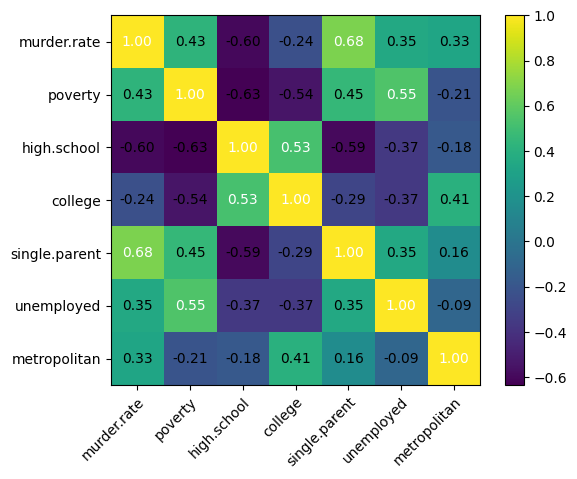

In [5]:
numeric_features = df.select_dtypes(include=['float64']).columns
cm=df[numeric_features].corr().values
heatmap(cm, row_names=numeric_features, column_names=numeric_features)

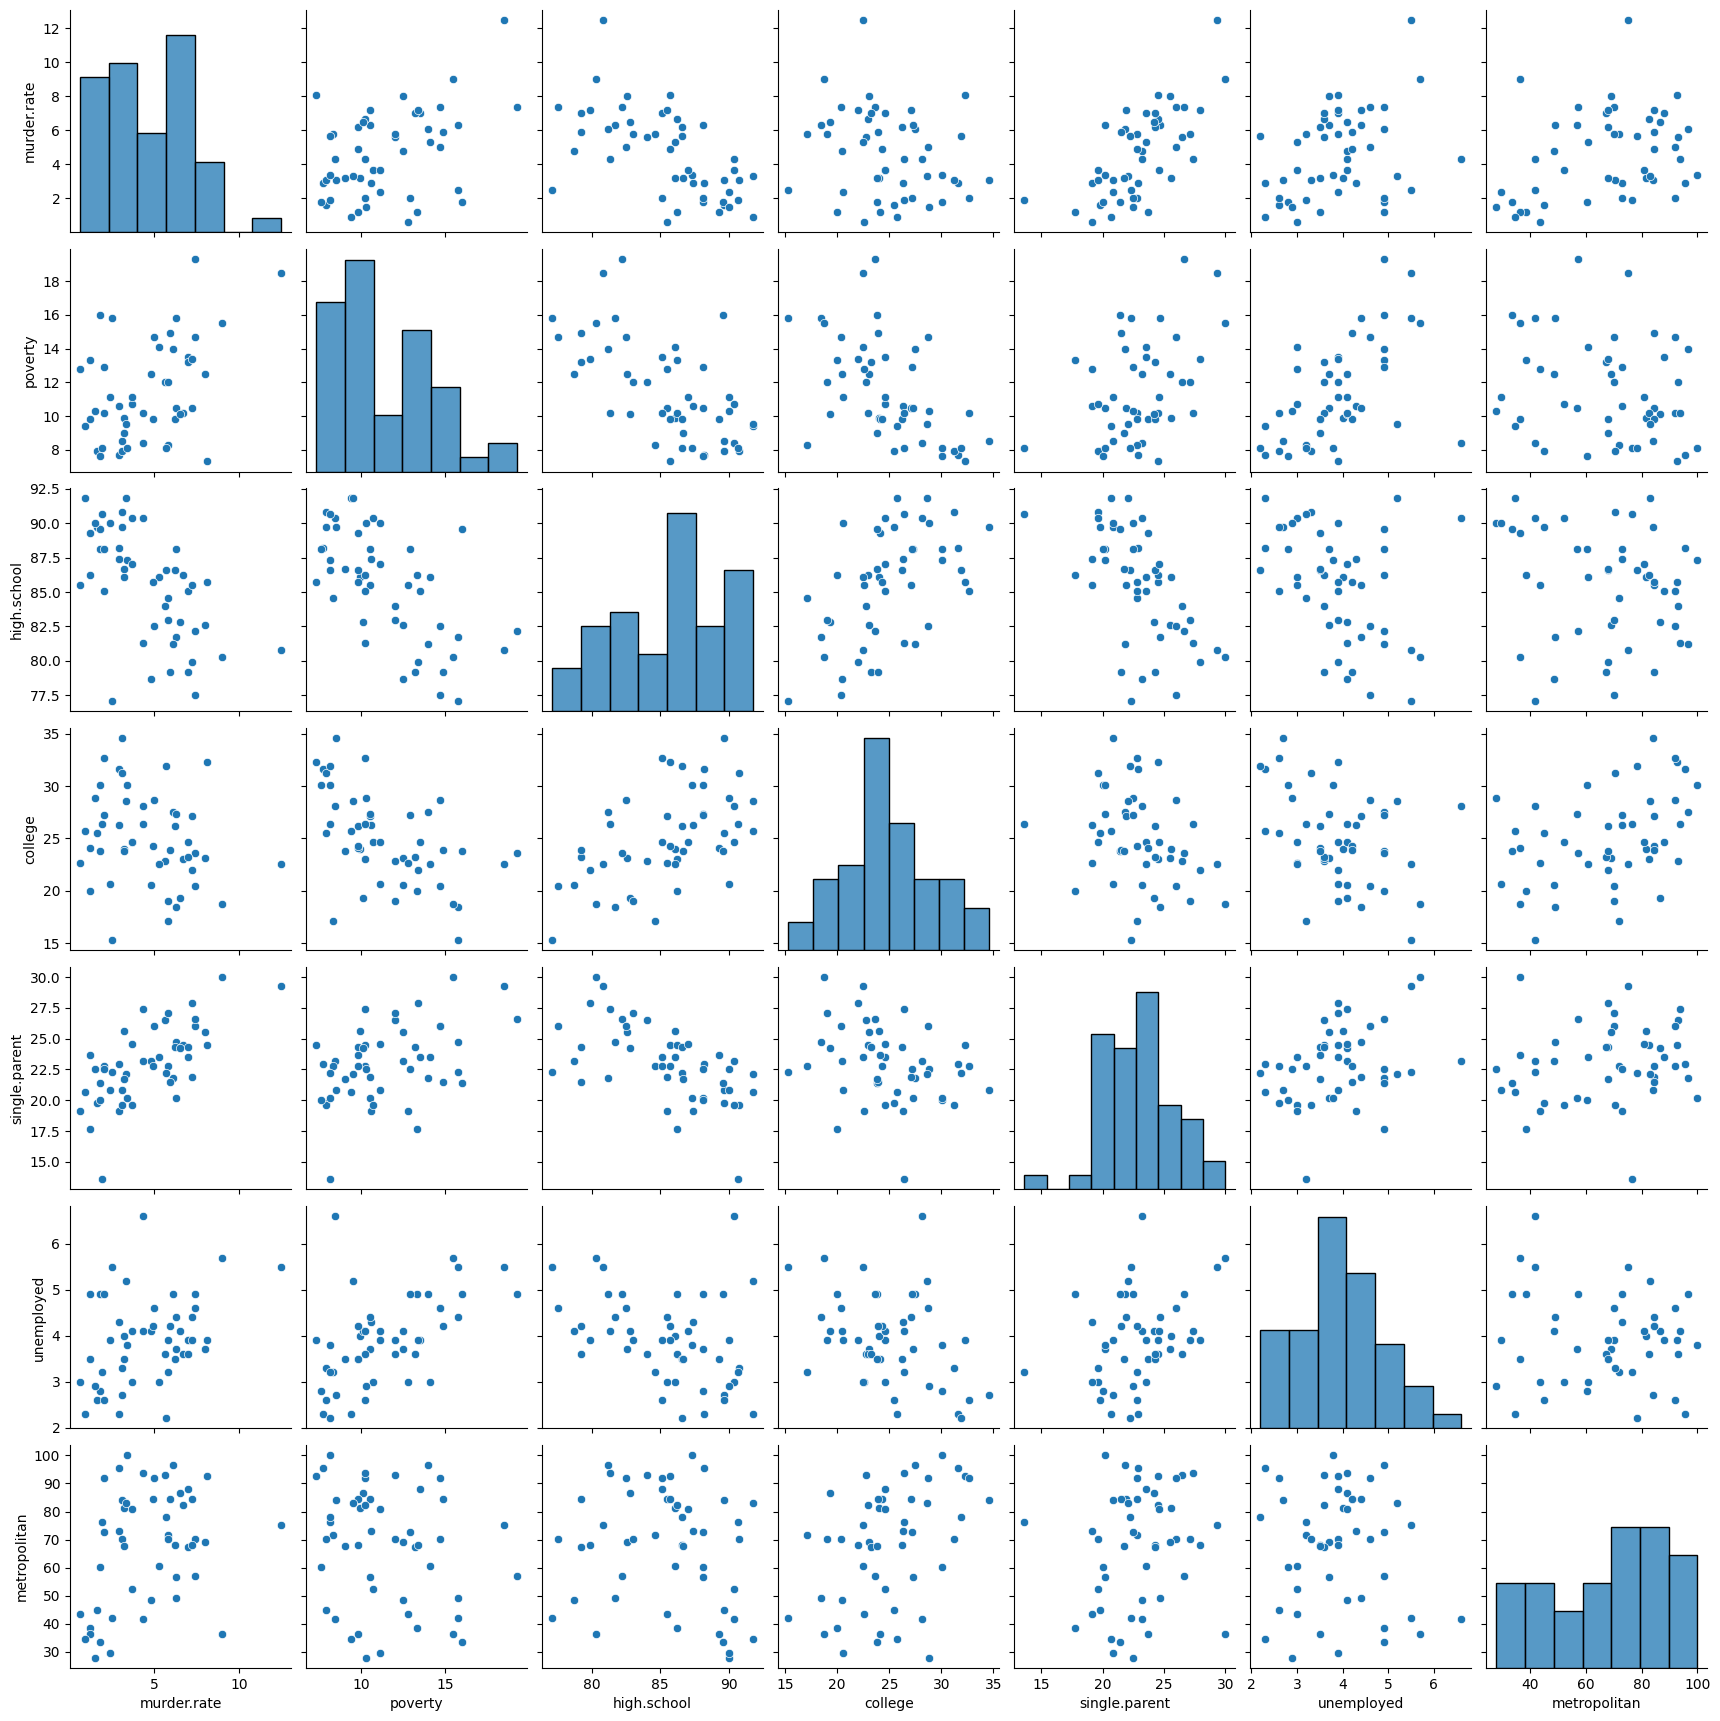

In [6]:
sns.pairplot(df)

Comparing pairplot and heatmap, the heatmap is clearer to find out the correlation between features. 
pairplot is more useful to for visually examining how two variables interact and how their values change together.
murder.rate and single.parent has strong positive correlationship on heatmap , which is also reflected in the pairplot where both variables increase together. 
 And high school graduation rate and poverty have a negative correlation. It's make sense when looking at the the plots. 
 as higher graduation rates tend to be associated with lower poverty levels.
 And they also have correlationship between highschool and poverty.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'murder.rate'),
  Text(1, 0, 'poverty'),
  Text(2, 0, 'high.school'),
  Text(3, 0, 'college'),
  Text(4, 0, 'single.parent'),
  Text(5, 0, 'unemployed'),
  Text(6, 0, 'metropolitan')])

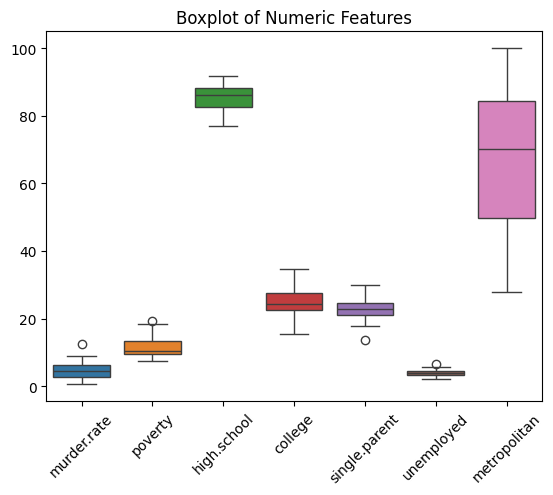

In [7]:
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)

In [8]:
Q1 = df['murder.rate'].quantile(0.25)
Q3 = df['murder.rate'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


In [9]:
outliers = df[(df['murder.rate'] < lower) | (df['murder.rate'] > upper)]
outliers[['state', 'murder.rate']]


,state,murder.rate
17,Lousiana,12.5


In [10]:
numeric_cols = ['murder.rate', 'poverty', 'high.school', 'college', 'single.parent', 'unemployed', 'metropolitan']
outliers_df1 = []
outliers_df2 = []
for col in numeric_cols: 
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_df1.append(outliers[['state', col]])
    outliers_df2.append(outliers)

outliers_df1 = pd.concat(outliers_df1, ignore_index=True) #to make it clear, make dateframe
outliers_df2 = pd.concat(outliers_df2, ignore_index=True)   


In [11]:
outliers_df1 #select to show what columns have outliers

,state,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan
0,Lousiana,12.5,NaN,NaN,NaN,NaN,NaN,NaN
1,New_Mexico,NaN,19.3,NaN,NaN,NaN,NaN,NaN
2,Utah,NaN,NaN,NaN,NaN,13.6,NaN,NaN
3,Alaska,NaN,NaN,NaN,NaN,NaN,6.6,NaN


In [12]:
outliers_df2 #select all

,state,murder.rate,poverty,high.school,college,single.parent,unemployed,metropolitan,region
0,Lousiana,12.5,18.5,80.8,22.5,29.3,5.5,75.2,South
1,New_Mexico,7.4,19.3,82.2,23.6,26.6,4.9,57.0,West
2,Utah,1.9,8.1,90.7,26.4,13.6,3.2,76.4,West
3,Alaska,4.3,8.4,90.4,28.1,23.2,6.6,41.6,West


Using the IQR rule, several observations were flagged as outliers. However, the IQR method only identifies values that are statistically distant from the center of the distribution; 
it does not determine whether these values are erroneous or meaningful. All detected outliers fall within normal and physically possible ranges (0–100 for percentage-based variables), 
and none deviate excessively from the main distribution. After identifying which states produced these values, I found that each outlier corresponds to a well‑known real‑world characteristic of that state (e.g., high murder rate in Louisiana, high poverty in New Mexico, low single‑parent rate in Utah, and high unemployment in Alaska). Because these values are realistic and explainable rather than errors, I chose to retain them. To further understand the relationships among these extreme cases, I generated a separate heatmap using only the outlier subset.

<Axes: >

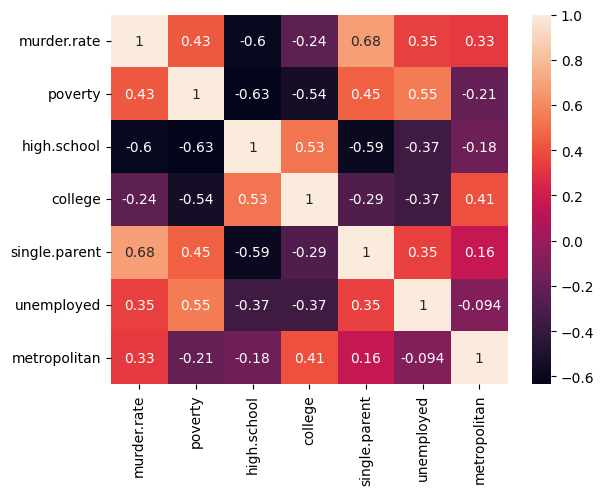

In [13]:
numeric_features_outlier = outliers_df2.select_dtypes(include=['float64']).columns.tolist()
cm1=df[numeric_features_outlier].corr()
sns.heatmap(cm1, annot=True,xticklabels=numeric_features_outlier, yticklabels=numeric_features_outlier)
#heatmap of ouliers. It show similar correlationship with origin group. So I will not remove the outliers

In [14]:
#2. Scikit-learn Baseline Pipeline

a) Build a Pipeline that integrates a ColumnTransformer with the following steps in order:

• Missing-value imputation (median strategy for numeric features).

• One-hot encoding for region (with drop='first' to avoid multicollinearity).

• Standardization of all numeric features using StandardScaler.

• scikit-learn’s LinearRegression estimator.


In [16]:
df.columns

Index(['state', 'murder.rate', 'poverty', 'high.school', 'college',
       'single.parent', 'unemployed', 'metropolitan', 'region'],
      dtype='str')

In [17]:
x = df.drop('murder.rate',axis=1)
y = df['murder.rate']

In [18]:
x.head()

,state,poverty,high.school,college,single.parent,unemployed,metropolitan,region
0,Alabama,14.7,77.5,20.4,26.0,4.6,70.2,South
1,Alaska,8.4,90.4,28.1,23.2,6.6,41.6,West
2,Arizona,13.5,85.1,24.6,23.5,3.9,87.9,West
3,Arkansas,15.8,81.7,18.4,24.7,4.4,49.0,South
4,California,14.0,81.2,27.5,21.8,4.9,96.7,West


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.50, random_state=42)

In [20]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['poverty', 'high.school', 'college', 'single.parent', 'unemployed',
       'metropolitan'],
      dtype='str')

In [21]:
categorical_features=X_train.select_dtypes(include=['str']).columns
categorical_features

Index(['state', 'region'], dtype='str')

In [22]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('Scaler', StandardScaler())])

In [ ]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [24]:
preprocessor = ColumnTransformer(transformers=[('num',num_pipeline,numeric_features), ('cat',cat_pipeline,categorical_features)])

In [25]:
preprocessor


,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [ ]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_score(y_train,y_train_pred)
r2_score(y_test,y_test_pred)